In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import solvers, equations
from scipy.sparse.linalg import bicgstab

%matplotlib inline

# Multigrid

Below you can see a template that we used to compare different GaBP with default smoothers in the multigrid context. All examples from the article can be reproduced by a suitable combination of lines in the box next to this one.

In [2]:
# boundary_layers
epsilon = 0.02
#epsilon = 0.01

# nonaligned_inner_layers
#epsilon = 0.015
#epsilon = 0.01

# stretched grid
#eta, p, epsilon = 0.5, 20, 1e-6 # stretching x40
#eta, p, epsilon = 0.5, 20, 2e-7 # stretching x100
#eta, p, epsilon = 0.5, 20, 8e-8 # stretching x160

# nonaligned_non_uniform_grid
#epsilon1, epsilon2 = 0.1, 0.01
#epsilon1, epsilon2 = 0.01, 0.01
#epsilon1, epsilon2 = 0.005, 0.01
epsilon1, epsilon2 = 0.01, 0.001

# large_mixed_term
#epsilon = 0.01
#epsilon = 0.001
#epsilon = 0.0001
#epsilon = 0
#epsilon = -0.01

#anisotropy_plus_mixing
#epsilon1, epsilon2, epsilon3 = 0.1, 0.01, 35

#eq = lambda L_x, L_y, eps = epsilon: equations.nonaligned_inner_layers(L_x, L_y, epsilon = eps)
eq = lambda L_x, L_y, eps = epsilon: equations.boundary_layers(L_x, L_y, epsilon = eps)
#eq = lambda L_x, L_y, et=eta, p=p, ep=epsilon: equations.non_uniform_grid(L_x, L_y, eta=et, p=p, eps=ep)
#eq = lambda L_x, L_y, ep1=epsilon1, ep2=epsilon2: equations.nonaligned_non_uniform_grid(L_x, L_y, eps1=ep1, eps2=ep2)
#eq = lambda L_x, L_y, ep=epsilon: equations.large_mixed_term(L_x, L_y, eps=ep)
#eq = lambda L_x, L_y, ep1=epsilon1, ep2=epsilon2, ep3=epsilon3: equations.anisotropy_plus_mixing(L_x, L_y, eps1=ep1, eps2=ep2, eps=ep3)
#eq = equations.equation_6

J = 6
A, b = equations.construct_multigrid_hierarchy(eq, J, J)
#A, b = construct_multigrid_hierarchy(6, 4)

#a, b, c = 10, 11, 12
#with open('spreadsheet.csv', 'w') as writer:
#    writer.write(f'')

Iteration #1
      error = 4.4
Iteration #2
      error = 0.11
Iteration #3
      error = 0.0032
Iteration #4
      error = 9.1e-05


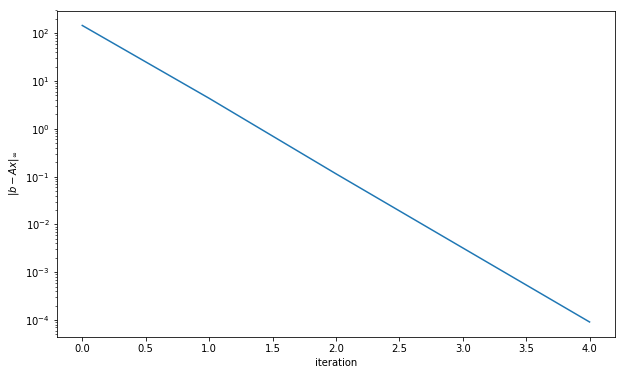

In [3]:
N_pre = 6
N_post = 0
tol = 2**(-2*J)

# colour smoothers
#smoother = solvers.red_black_GS_smoother
smoother = solvers.red_black_GaBP_smoother
#smoother = solvers.four_colours_GS_smoother
#smoother = solvers.four_colours_GaBP_smoother

# point smoothers
#smoother = solvers.GS_smoother
#smoother = solvers.GaBP_smoother

# line smoothers
#smoother = solvers.GS_line_xy_smoother
#smoother = solvers.GS_line_y_smoother
#smoother = solvers.GS_line_x_smoother
#smoother = solvers.stripes_GaBP_smoother

# ilu
#solvers.fill_factor = 8
#smoother = solvers.ilu_smoother

sol, E = solvers.multigrid_solver(A, b, smoother, N_pre, N_post, tol, verbose=True, write=True)
#sol, E = solvers.BICGSTAB(A[0], b, verbose=True, write=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(E)
ax.set_yscale('log')
ax.set_xlabel('iteration')
ax.set_ylabel(r'$\left|b - Ax\right|_{\infty}$');

# Singularly perturbed problems

The illustration that the convergence speed of GaBP does not depend on the strength of the anisotropy.

In [4]:
EE = []
eps = []
tol = 1e-5
N_pre, N_post = 2, 2
smoother = solvers.GaBP_smoother
for epsilon in np.logspace(-6, -3, 4):
    eps.append(epsilon)
    equation = lambda L_x, L_y, eps=epsilon: equations.anisotropic_equation_0(L_x, L_y, eps)
    A, b = equations.construct_multigrid_hierarchy(equation, 6, 3)
    _, E = solvers.multigrid_solver(A, b, smoother, N_pre, N_post, tol, verbose=False, write=True)
    EE.append(E)

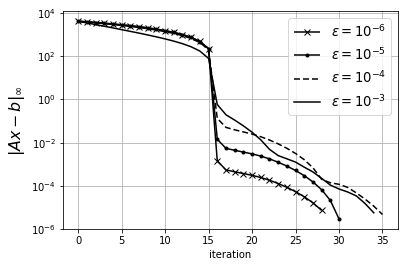

In [5]:
fig, ax = plt.subplots(1, 1)
matplotlib.rcParams.update({'font.size': 11})

ax.plot(EE[0], 'x', dashes=[2, 0, 2, 0], color='black', label='$\\epsilon = 10^{-6}$')
ax.plot(EE[1], '.', dashes=[2, 0, 2, 0], color='black', label='$\\epsilon = 10^{-5}$')
ax.plot(EE[2], dashes=[4, 2, 4, 2], color='black', label='$\\epsilon = 10^{-4}$')
ax.plot(EE[3], color='black', label='$\\epsilon = 10^{-3}$')
ax.set_xlabel('iteration')
ax.set_ylabel('$\\left\|Ax - b\\right\|_{\\infty}$', fontsize='x-large')
ax.grid()
ax.set_yscale('log')
ax.legend(fontsize='large');
#plt.savefig('anisotropic_equation_2_sweeps.pdf', format='pdf')

In [6]:
EE = []
eps = []
N_pre, N_post = 3, 3
smoother = solvers.GaBP_smoother
for epsilon in np.logspace(-6, -3, 4):
    eps.append(epsilon)
    equation = lambda L_x, L_y, eps=epsilon: equations.anisotropic_equation_0(L_x, L_y, eps)
    A, b = equations.construct_multigrid_hierarchy(equation, 6, 3)
    _, E = solvers.multigrid_solver(A, b, smoother, N_pre, N_post, tol, verbose=False, write=True)
    EE.append(E)

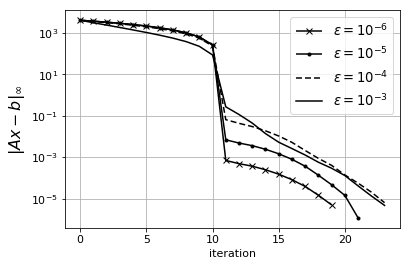

In [7]:
fig, ax = plt.subplots(1, 1)
matplotlib.rcParams.update({'font.size': 11})

ax.plot(EE[0], 'x', dashes=[2, 0, 2, 0], color='black', label='$\\epsilon = 10^{-6}$')
ax.plot(EE[1], '.', dashes=[2, 0, 2, 0], color='black', label='$\\epsilon = 10^{-5}$')
ax.plot(EE[2], dashes=[4, 2, 4, 2], color='black', label='$\\epsilon = 10^{-4}$')
ax.plot(EE[3], color='black', label='$\\epsilon = 10^{-3}$')
ax.set_xlabel('iteration')
ax.set_ylabel('$\\left\|Ax - b\\right\|_{\\infty}$', fontsize='x-large')
ax.grid()
ax.set_yscale('log')
ax.legend(fontsize='large');
#plt.savefig('anisotropic_equation_3_sweeps.pdf', format='pdf')